In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [42]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("nba_2013.csv")
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [43]:
df = df.set_index('player')
df.isnull().sum()

pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [44]:
df['fg.'].fillna(df['fg.'].mean(), inplace =True)
df['x3p.'].fillna(df['x3p.'].mean(), inplace =True)
df['x2p.'].fillna(df['x3p.'].mean(), inplace =True)
df['efg.'].fillna(df['x3p.'].mean(), inplace =True)
df['ft.'].fillna(df['ft.'].mean(), inplace =True)

In [45]:
df.drop(['bref_team_id','season','season_end','pos'], axis=1, inplace=True)

In [46]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.465813,0.479938,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098467,50.855639,132.751732,0.146218,147.223161,294.174554,0.105102,0.100141,103.667725,131.240639,0.156794,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.401000,0.000000,3.000000,0.262626,31.000000,67.000000,0.433824,0.451000,16.000000,22.000000,0.657000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.437000,16.000000,48.000000,0.314607,110.000000,227.000000,0.473779,0.487000,53.000000,73.000000,0.750000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479000,68.000000,193.000000,0.366460,230.000000,459.000000,0.513120,0.525000,126.000000,179.000000,0.816000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000


In [47]:
X_cols = [col for col in df.columns if 'pts' not in col]
X = df.loc[:,X_cols]
y = df.loc[:,'pts']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [49]:
X_train.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
player,,,,,,,,,,,,,,,,,,,,,,,,,
Nick Collison,33,81,0,1353,134,241,0.556,4,17,0.235294,130,224,0.580357,0.564,66,93,0.710000,116,177,293,104,30,28,71,187
George Hill,27,76,76,2434,272,616,0.442,95,260,0.365385,177,356,0.497191,0.519,142,176,0.807000,53,230,283,265,75,23,92,158
Troy Daniels,22,5,1,75,15,31,0.484,12,25,0.480000,3,6,0.500000,0.677,0,0,0.722419,0,4,4,5,0,0,3,6
Kelly Olynyk,22,70,9,1400,234,502,0.466,40,114,0.350877,194,388,0.500000,0.506,99,122,0.811000,140,225,365,109,35,27,106,227
Mike Dunleavy,33,82,61,2584,333,774,0.430,123,324,0.379630,210,450,0.466667,0.510,140,164,0.854000,46,299,345,186,64,46,108,163


In [52]:
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

In [53]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 175.7369606509768
RMSE value for k=  2 is: 140.42034741070165
RMSE value for k=  3 is: 125.21971874043045
RMSE value for k=  4 is: 123.55911273088269
RMSE value for k=  5 is: 122.87874154615574
RMSE value for k=  6 is: 117.567112498481
RMSE value for k=  7 is: 119.65033316437143
RMSE value for k=  8 is: 120.76275962220409
RMSE value for k=  9 is: 120.38751708533759
RMSE value for k=  10 is: 124.78920341622586
RMSE value for k=  11 is: 123.1210370670197
RMSE value for k=  12 is: 125.28450726012497
RMSE value for k=  13 is: 125.31962422366524
RMSE value for k=  14 is: 126.61333759737813
RMSE value for k=  15 is: 128.1446687337605
RMSE value for k=  16 is: 130.92932367122398
RMSE value for k=  17 is: 129.24613953915983
RMSE value for k=  18 is: 130.70109983161643
RMSE value for k=  19 is: 131.9859623968391
RMSE value for k=  20 is: 132.53076627057


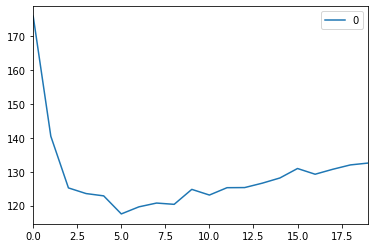

In [54]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [55]:
# The optimal value of k in the given situation
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 4}

In [56]:
model = neighbors.KNeighborsRegressor(n_neighbors = 6)
model.fit(X_train, y_train)
pred=model.predict(X_test)
y_test[0:10]

player
Chris Babb            22
Jordan Crawford      890
Shannon Brown         63
Andrew Nicholson     435
Jodie Meeks         1209
Andray Blatche       821
Julyan Stone          18
Mirza Teletovic      622
Patrick Mills        826
Manu Ginobili        838
Name: pts, dtype: int64

In [57]:
pred[0:10]

array([  38.16666667,  905.33333333,   57.66666667,  521.66666667,
       1245.33333333,  784.        ,   32.83333333,  686.66666667,
        845.        ,  871.16666667])